In [1]:
import os

In [2]:
os.chdir("D:\\new13")

In [3]:
os.getcwd()

'D:\\new13'

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [5]:
import rasterio

In [6]:
data_path=r"D:\new13\training" 
CATEGORIES= ["nf", "f"]

IMG_SIZE= 13

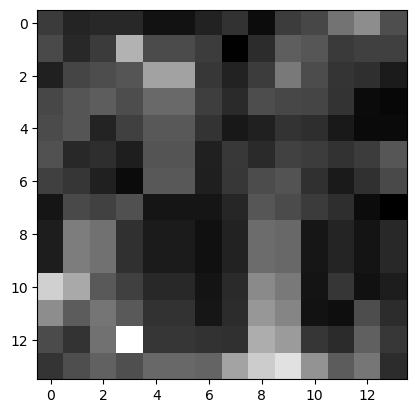

[[ 5.923587   5.4265094  5.530468   5.49612    4.99773    4.99773
   5.353577   5.7322755  4.8641386  5.94349    6.1946907  7.177554
   7.7721367  6.340774 ]
 [ 6.2521944  5.4971585  5.9309583  8.585092   6.2775316  6.2775316
   5.9403276  4.6263237  5.5831485  6.7015934  6.539775   5.9037127
   6.0378337  6.0326877]
 [ 5.34125    6.1513247  6.3214874  6.497898   8.238519   8.238519
   5.836508   5.357296   5.9689436  7.345983   6.3069854  5.7867045
   5.6577153  5.1994104]
 [ 6.1945972  6.503917   6.681761   6.335187   6.975654   6.975654
   5.9886136  5.5436974  6.331727   6.183081   6.142745   5.736545
   4.8479896  4.7650304]
 [ 6.2872167  6.4969378  5.3783627  6.047505   6.579158   6.579158
   5.736545   5.138771   5.3420115  5.736545   5.6283402  5.1664257
   4.8142505  4.835934 ]
 [ 6.429022   5.493017   5.637546   5.281767   6.4745216  6.4745216
   5.346606   5.8764863  5.5360546  6.086486   5.974914   5.7119904
   5.96737    6.5367637]
 [ 6.044735   5.815551   5.3231273  4.846

In [7]:
for category in CATEGORIES:
    path=os.path.join(data_path,category) # Path to flooded and NotFlooded dir
    for img in os.listdir(path):
        img_open=rasterio.open(os.path.join(path,img))
        img_array=img_open.read(17) # open the image and read the first band
        plt.imshow(img_array,cmap="gray")
        plt.show()
        print(img_array)
        break
    break

In [8]:
Aspect = []
CN = []
Curvature = []
DD = []
DEM = []
DR = []
Flow_ACC = []
Geology = []
Geomorphology = []
LULC = []
NDVI = []
Rainfall = []
Slope = []
Soil = []
SPI = []
STI = []
TWI = []
y = []
predictive_features = [Aspect, CN, Curvature, DD,DEM, DR, Flow_ACC, Geology, Geomorphology, LULC, NDVI, Rainfall, Slope,Soil, SPI,STI,TWI]

print(len(predictive_features))

17


In [9]:
def create_training_data():
    for i in range(len(predictive_features)):
        print(i+1)
        for category in CATEGORIES:
            path= os.path.join(data_path,category) # Path to flooded and NotFlooded dir
            class_num= CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_open=rasterio.open(os.path.join(path,img))
                    print(category,img,class_num)
                    img_array=img_open.read(i+1)
                    #XNormed = (img_array -  img_array.mean())/(img_array.std())
                    img_array= np.where(img_array <= -100, np.nan, img_array)
                    mean=np.nanmean(img_array)
                    img_array= np.where(np.isnan(img_array), mean,img_array)
                    img_array[np.isnan(img_array)] = 0
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    predictive_features[i].append(new_array)
                    
                    if i==0:
                        y.append(class_num)
                        #print(class_num)
                except Exception as e:
                    pass
create_training_data()

1
nf 0.tif 0
nf 1.tif 0
nf 10.tif 0
nf 100.tif 0
nf 101.tif 0
nf 102.tif 0
nf 103.tif 0
nf 104.tif 0
nf 105.tif 0
nf 106.tif 0
nf 107.tif 0
nf 108.tif 0
nf 109.tif 0
nf 11.tif 0
nf 110.tif 0
nf 111.tif 0
nf 112.tif 0
nf 113.tif 0
nf 114.tif 0
nf 115.tif 0
nf 116.tif 0
nf 117.tif 0
nf 118.tif 0
nf 119.tif 0
nf 12.tif 0
nf 120.tif 0
nf 121.tif 0
nf 122.tif 0
nf 123.tif 0
nf 124.tif 0
nf 125.tif 0
nf 126.tif 0
nf 127.tif 0
nf 128.tif 0
nf 129.tif 0
nf 13.tif 0
nf 130.tif 0
nf 131.tif 0
nf 132.tif 0
nf 133.tif 0
nf 134.tif 0
nf 135.tif 0
nf 136.tif 0
nf 137.tif 0
nf 138.tif 0
nf 139.tif 0
nf 14.tif 0
nf 140.tif 0
nf 141.tif 0
nf 142.tif 0
nf 143.tif 0
nf 144.tif 0
nf 145.tif 0
nf 146.tif 0
nf 147.tif 0
nf 148.tif 0
nf 149.tif 0
nf 15.tif 0
nf 150.tif 0
nf 151.tif 0
nf 152.tif 0
nf 153.tif 0
nf 154.tif 0
nf 155.tif 0
nf 156.tif 0
nf 157.tif 0
nf 158.tif 0
nf 159.tif 0
nf 16.tif 0
nf 160.tif 0
nf 161.tif 0
nf 162.tif 0
nf 163.tif 0
nf 164.tif 0
nf 165.tif 0
nf 166.tif 0
nf 167.tif 0
nf 168.t

In [10]:
np.shape(DEM[12])

(13, 13)

In [11]:
len(DEM)

801

In [12]:
print(type(DEM))

<class 'list'>


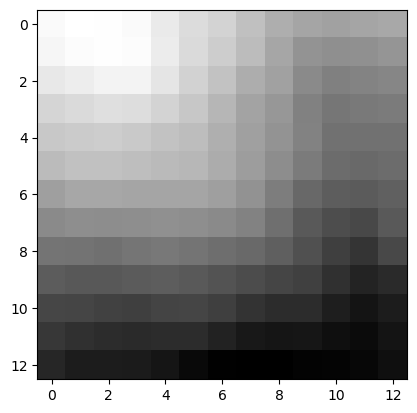

[[301.0769  304.81656 304.0074  301.10797 289.2663  278.99408 272.34616
  258.37576 244.56952 238.59024 235.10059 237.97485 240.42012]
 [298.11093 302.0281  303.5932  302.24704 290.68936 277.30768 267.6346
  255.01036 239.28845 225.72633 221.96745 222.81952 226.5858 ]
 [287.62277 291.34024 296.38165 295.29437 285.32248 271.4571  259.3654
  244.14496 235.47928 218.65384 211.1568  213.64792 215.59172]
 [273.63315 277.36096 280.6006  279.73077 271.9645  262.92456 250.61539
  236.8861  227.7855  211.6849  203.82544 206.82396 207.56656]
 [264.07693 266.23077 267.6154  264.3846  259.65384 256.03845 245.5
  234.38461 225.11539 212.5     200.11539 199.76923 200.96153]
 [254.44379 258.892   259.15384 256.4926  253.60059 251.61241 243.17308
  232.20415 220.91716 207.1139  196.66568 194.93639 196.29141]
 [233.75    240.      239.71155 238.36539 238.17308 238.28845 234.
  224.51923 209.0577  193.13461 185.46153 183.61539 187.82693]
 [218.04881 221.10799 220.60207 221.65828 222.72337 221.6139  218.

In [13]:
plt.imshow(DEM[89],cmap="gray")
plt.show()
print(DEM[89])

In [14]:
Aspect_aaray = np.array(Aspect).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
CN_array = np.array(CN).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Curvature_array = np.array(Curvature).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DD_array = np.array(DD).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DEM_array = np.array(DEM).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DR_array = np.array(DR).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Flow_ACC_array = np.array(Flow_ACC).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Geology_array = np.array(Geology).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Geomorphology_array = np.array(Geomorphology).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
LULC_array = np.array(LULC).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
NDVI_array = np.array(NDVI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Rainfall_array = np.array(Rainfall).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Slope_array = np.array(Slope).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Soil_array = np.array(Soil).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
SPI_array = np.array(SPI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
STI_array = np.array(STI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
TWI_array = np.array(TWI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [15]:
X_array=np.concatenate([Aspect_aaray, CN_array, Curvature_array, DD_array,DEM_array, DR_array, Flow_ACC_array,  Geology_array, Geomorphology_array, LULC_array, NDVI_array,Rainfall_array,Slope_array, Soil_array,SPI_array,STI_array, TWI_array], axis = -1)

In [16]:
print(X_array.shape)

(801, 13, 13, 17)


In [17]:
y = np.array(y)

In [18]:
y.shape

(801,)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn import preprocessing as pre

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_array,y,test_size=0.3,shuffle=True)

In [22]:
x_train.shape

(560, 13, 13, 17)

In [23]:
y_train

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,

In [24]:
import tensorflow as tf

In [25]:
import keras

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import TensorBoard



In [27]:
from keras.layers import normalization 
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers
from keras.regularizers import l2

In [37]:
model = Sequential()
#Layer 1
#Conv Layer 1
model.add(Conv2D(filters =8,
                 kernel_size = 3,
                 kernel_regularizer=l2(0.001),
                 bias_regularizer=l2(0.001),
                 strides = 1,
                 activation = 'relu',
                 input_shape = (13,13,17)))
model.add(BatchNormalization())
#Pooling layer 1
model.add(MaxPooling2D(pool_size = 2, strides = 2))

#add a droupout
model.add(Dropout(0.5))

#Flatten
model.add(Flatten())

#Layer 4
#Fully connected layer 2
model.add(Dense(units = 120, activation = 'relu',kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))

model.add(BatchNormalization())
model.add(Dropout(0.5))



model.add(Dense(units = 64, activation = 'relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Layer 5
#Output Layer
model.add(Dense(units = 2, activation = 'softmax'))

model.compile(optimizer= 'nadam', loss = 'SparseCategoricalCrossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 11, 11, 8)         1232      
                                                                 
 batch_normalization_3 (Batc  (None, 11, 11, 8)        32        
 hNormalization)                                                 
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 5, 5, 8)           0         
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [38]:
history=model.fit(x_train ,y_train, batch_size= 16, epochs = 130, validation_data=(x_test, y_test), verbose=2)

Epoch 1/130
35/35 - 4s - loss: 1.4522 - accuracy: 0.4679 - val_loss: 0.9171 - val_accuracy: 0.6556 - 4s/epoch - 117ms/step
Epoch 2/130
35/35 - 0s - loss: 1.0175 - accuracy: 0.6143 - val_loss: 0.8827 - val_accuracy: 0.6515 - 297ms/epoch - 8ms/step
Epoch 3/130
35/35 - 0s - loss: 0.8682 - accuracy: 0.6946 - val_loss: 0.8633 - val_accuracy: 0.6349 - 338ms/epoch - 10ms/step
Epoch 4/130
35/35 - 0s - loss: 0.7293 - accuracy: 0.7750 - val_loss: 0.8403 - val_accuracy: 0.6432 - 328ms/epoch - 9ms/step
Epoch 5/130
35/35 - 0s - loss: 0.6394 - accuracy: 0.8196 - val_loss: 0.8647 - val_accuracy: 0.6100 - 330ms/epoch - 9ms/step
Epoch 6/130
35/35 - 0s - loss: 0.6498 - accuracy: 0.8304 - val_loss: 0.8372 - val_accuracy: 0.5975 - 352ms/epoch - 10ms/step
Epoch 7/130
35/35 - 0s - loss: 0.4673 - accuracy: 0.9125 - val_loss: 0.8027 - val_accuracy: 0.5934 - 367ms/epoch - 10ms/step
Epoch 8/130
35/35 - 0s - loss: 0.3763 - accuracy: 0.9536 - val_loss: 0.8236 - val_accuracy: 0.5768 - 349ms/epoch - 10ms/step
Epoch

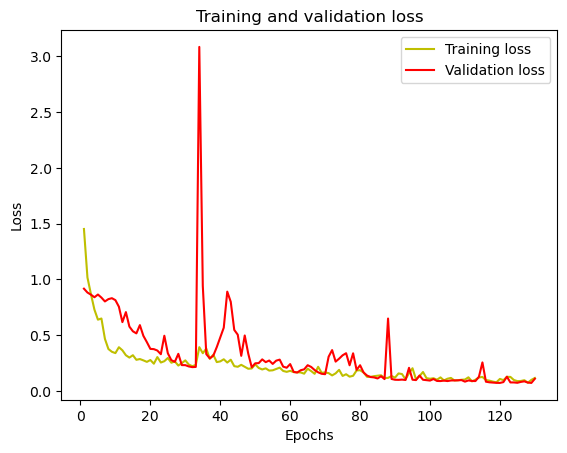

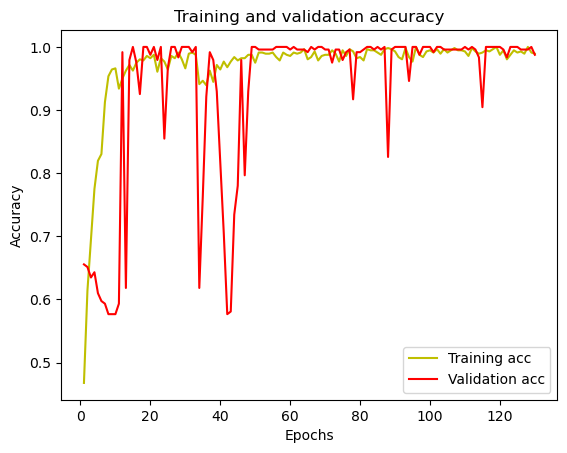

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
y_test

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [41]:
preds = model.predict(x_test)

8/8 [==============================] - 0s 5ms/step


In [42]:
preds_class = np.argmax(preds, axis=-1)
preds_class

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [43]:
from sklearn import metrics

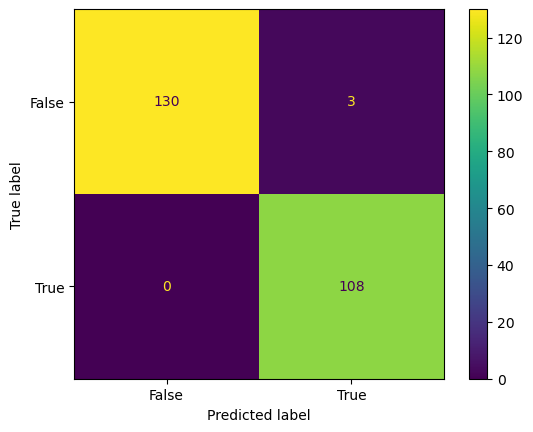

In [44]:
confusion_matrix = metrics.confusion_matrix(y_test, preds_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [45]:
Accuracy = metrics.accuracy_score(y_test, preds_class)
Accuracy

0.9875518672199171

In [46]:
pred_train = model.predict(x_train)

18/18 [==============================] - 0s 4ms/step


In [47]:
preds_class2= np.argmax(pred_train, axis=-1)
preds_class2

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [1]:
Accuracy2 = metrics.accuracy_score(y_train, preds_class2)
Accuracy

NameError: name 'metrics' is not defined

In [49]:
#Of the positives predicted, what percentage is truly positive?
#True Positive / (True Positive + False Positive)
Precision = metrics.precision_score(y_test, preds_class)
Precision

0.972972972972973

In [50]:
#Of all the positive cases, what percentage are predicted positive?
#True Positive / (True Positive + False Negative)
Sensitivity_recall = metrics.recall_score(y_test, preds_class)
Sensitivity_recall

1.0

In [51]:
#How well the model is at prediciting negative results?
Specificity = metrics.recall_score(y_test, preds_class, pos_label=0)
Specificity

0.9774436090225563

In [52]:
#F-score is the "harmonic mean" of precision and sensitivity.
#2 * ((Precision * Sensitivity) / (Precision + Sensitivity))
F1_score = metrics.f1_score(y_test, preds_class)
F1_score 

0.9863013698630138

In [53]:
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})


{'Accuracy': 0.9785714285714285, 'Precision': 0.972972972972973, 'Sensitivity_recall': 1.0, 'Specificity': 0.9774436090225563, 'F1_score': 0.9863013698630138}


In [54]:
from sklearn.metrics import plot_roc_curve

In [55]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, preds_class)


8/8 [==============================] - 0s 6ms/step


In [56]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

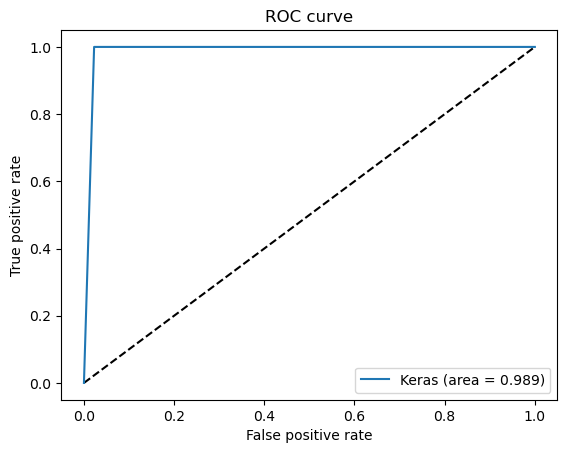

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
data_path = r"D:\new13\f"

In [ ]:
Aspect = []
CN = []
Curvature = []
DD = []
DEM = []
DR = []
Flow_ACC = []
Geology = []
Geomorphology = []
LULC = []
NDVI = []
Rainfall = []
Slope = []
Soil = []
SPI = []
STI = []
TWI = []
y = []
predictive_features = [Aspect, CN, Curvature, DD,DEM, DR, Flow_ACC, Geology, Geomorphology, LULC, NDVI, Rainfall, Slope,Soil, SPI,STI,TWI]

print(len(predictive_features))


In [ ]:
IMG_SIZE = 13

In [ ]:
def create_training_data():
    for i in range(len(predictive_features)):
        print(i+1)
        #for category in CATEGORIES:
        path= os.path.join(data_path) # Path to flooded and NotFlooded dir
            #class_num= CATEGORIES.index(category)
        for img in os.listdir(path):
                try:
                    img_open=rasterio.open(os.path.join(path,img))
                    print(img)
                    img_array=img_open.read(i+1)
                    #XNormed = (img_array -  img_array.mean())/( img_array.std())
                    img_array= np.where(img_array <= -100, np.nan,img_array)
                    mean=np.nanmean(img_array)
                    img_array= np.where(np.isnan(img_array), mean,img_array)
                    img_array[np.isnan(img_array)] = 0
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                    predictive_features[i].append(new_array)
                    
                    if i==0:
                        #y.append(class_num)
                        #print(class_num)
                        name.append(img)
                except Exception as e:
                    pass
create_training_data()

In [ ]:
plt.imshow(SPI[1],cmap="gray")
plt.show()
print(SPI[1])

In [ ]:
Aspect_aaray = np.array(Aspect).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
CN_array = np.array(CN).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Curvature_array = np.array(Curvature).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DD_array = np.array(DD).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DEM_array = np.array(DEM).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
DR_array = np.array(DR).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Flow_ACC_array = np.array(Flow_ACC).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Geology_array = np.array(Geology).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Geomorphology_array = np.array(Geomorphology).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
LULC_array = np.array(LULC).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
NDVI_array = np.array(NDVI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Rainfall_array = np.array(Rainfall).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Slope_array = np.array(Slope).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Soil_array = np.array(Soil).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
SPI_array = np.array(SPI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
STI_array = np.array(STI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
TWI_array = np.array(TWI).reshape(-1, IMG_SIZE, IMG_SIZE, 1)



In [ ]:
X=np.concatenate([Aspect_aaray, CN_array, Curvature_array, DD_array,DEM_array, DR_array, Flow_ACC_array,  Geology_array, Geomorphology_array, LULC_array, NDVI_array,Rainfall_array,Slope_array, Soil_array,SPI_array,STI_array, TWI_array], axis = -1)

In [ ]:
print(X.shape)

In [ ]:
y =model.predict(X)
y

In [ ]:
preds_classes = np.argmax(y, axis=-1)
preds_classes

In [ ]:
import pandas as pd

In [ ]:
DF = pd.DataFrame(y)
DF

In [ ]:
DF.to_csv("modrms.csv")